In [5]:
MAIN_DIRECTORY = "./assets/ETL9G"
OUTPUT_DIRECTORY = "./assets/ETL9G_OUTPUT"

A single CSV file contains multiple images and multiple txt files. For that reason, use csv file names as a standard

In [6]:
import os
csv_directory = os.listdir(MAIN_DIRECTORY + "/csv")
ETL9G_FILES = [file_name.split(".")[0] for file_name in csv_directory]
ETL9G_FILES.sort()

In [7]:
def retrieve_images(file_number):
  img_directory = os.listdir(MAIN_DIRECTORY + "/png")
  img_directory = [file_name for file_name in img_directory if file_name.startswith(file_number)]
  return img_directory

In [8]:
def retrieve_text(file_number):
  txt_directory = os.listdir(MAIN_DIRECTORY + "/txt")
  txt_directory = [file_name for file_name in txt_directory if file_name.startswith(file_number)]
  return txt_directory

In [102]:
from PIL import Image
def split_images(image_file_name):
  file_name = image_file_name.split(".")[0]
  with open(MAIN_DIRECTORY + "/txt/" + file_name + ".txt", "r") as file:
    lines = file.readlines()
  lines = [line.split("\n")[0] for line in lines]
  height = len(lines)
  width = len(lines[0])
  image = Image.open(MAIN_DIRECTORY + "/png/" +  image_file_name)
  image_width, image_height = image.size
  tile_width = image_width // width
  tile_height = image_height // height
  
  tiles = []
  
  for row in range(height):
    tile_row = []
    for col in range(width):
      left = col * tile_width
      upper = row * tile_height
      right = left + tile_width
      lower = upper + tile_height
      
      cropped = image.crop((left, upper, right, lower))
      tile_row.append(cropped)
    tiles.append(tile_row)
  lines = [list(line) for line in lines]
  return (tiles, lines)
  

In [12]:
import csv
class Kanji:
    def __init__(self, serial_sheet, jis_code, jis_reading, serial_data, evaluation_image, 
                 evaluation_group, male_female, age_writer, industry_classification, 
                 gathering_date, scanning_date, pos_x, pos_y):
      self.serial_sheet = serial_sheet
      self.jis_code = jis_code
      self.jis_reading = jis_reading
      self.serial_data = serial_data
      self.evaluation_image = evaluation_image
      self.evaluation_group = evaluation_group
      self.male_female = male_female
      self.age_writer = age_writer
      self.industry_classification = industry_classification
      self.gathering_date = gathering_date
      self.scanning_date = scanning_date
      self.pos_x = pos_x
      self.pos_y = pos_y
    
def read_csv(csv_file_name):
  Kanjis = []
  with open(MAIN_DIRECTORY + "/csv/" + csv_file_name) as file:
    reader  = csv.DictReader(file)
    for row in reader:
      kanji = Kanji(
          serial_sheet=int(row['Serial Sheet Number']),
          jis_code=row['JIS Kanji Code'],
          jis_reading=row['JIS Typical Reading'],
          serial_data=row['Serial Data Number'],
          evaluation_image=row['Evaluation of Individual Character Image'],
          evaluation_group=row['Evaluation of Character Group'],
          male_female=row['Male-Female Code'],
          age_writer=int(row['Age of Writer']),  # Assuming 'age_writer' is numeric
          industry_classification=row['Industry Classification Code'],
          gathering_date=row['Sheet Gatherring Date'],  # Ensure it's in the correct format (date parsing can be done if needed)
          scanning_date=row['Scanning Date'],  # Ensure it's in the correct format (date parsing can be done if needed)
          pos_x=int(row['Sample Position X on Sheet']),  # Assuming x and y are integers
          pos_y=int(row['Sample Position Y on Sheet'])   # Same for y position
          )
      Kanjis.append(kanji)
  return Kanjis

In [ ]:
images = retrieve_images(ETL9G_FILES[0])
for image in images:
  tiles, lines = split_images(image)
  for i in range(len(lines)):
    for j in range(len(lines[i])):
      tiles[i][j].save(OUTPUT_DIRECTORY + "/" + lines[i][j] + ".png")

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
['離陸律率立葎掠略わ劉流溜琉留硫粒隆竜龍侶慮旅虜了を亮僚両凌寮料梁涼猟療瞭稜糧良諒ん遼量陵領力緑倫厘林\n', '淋燐琳臨輪隣鱗麟瑠塁涙累類令伶例冷励嶺怜玲礼苓鈴隷零霊麗齢暦歴列劣烈裂廉恋憐漣煉簾練聯蓮連錬呂魯櫓炉\n', '賂路露労婁廊弄朗楼榔浪漏牢狼篭老聾蝋郎六麓禄肋録論倭和話歪賄脇惑枠鷲亙亘鰐詫藁蕨椀湾碗腕']
50
50
44
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50


In [ ]:
import numpy as np
import tensorflow as tf
def preprocess_tile(tile):
  image = np.array(tile)
  image = tf.convert_to_tensor(image, dtype=tf.float32)
  image = image/255.0
  return image

In [128]:
import tensorflow as tf
images = retrieve_images(ETL9G_FILES[0])
tiles_np = []
labels_np = []
for image in images:
  tiles, lines = split_images(image)
  for i in range(len(lines)):
    for j in range(len(lines[i])):
      tile = preprocess_tile(tiles[i][j])
      label = ord(lines[i][j])
      tile = tf.expand_dims(tile, axis=-1)
      tile = tf.image.resize(tile, [100, 100])
      tiles_np.append(tile)
      labels_np.append(label)
      
dataset = tf.data.Dataset.from_tensor_slices((tiles_np, labels_np))

tf.data.experimental.save(dataset, "dataset")

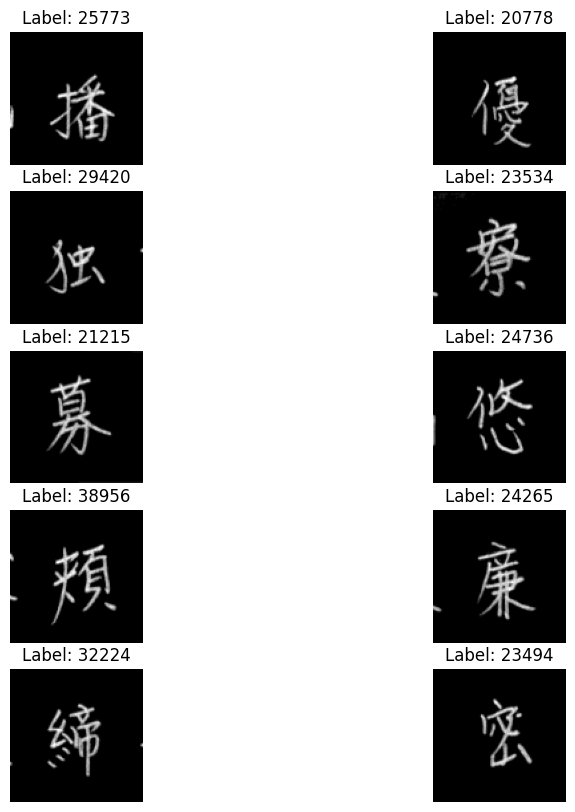

In [ ]:
import matplotlib.pyplot as plt
dataset = dataset.shuffle(1000).batch(10)

for batch_images, batch_labels in dataset.take(1):  # `take(1)` gets just the first batch
    # batch_images is a tensor, convert it to numpy array
    batch_images_np = batch_images.numpy()
    
    # Plot each image in the batch
    plt.figure(figsize=(10, 10))
    for i in range(batch_images_np.shape[0]):
        plt.subplot(5, 2, i+1)  # Assuming 5 rows, 2 columns for 10 images
        plt.imshow(batch_images_np[i].reshape(100, 100), cmap="gray")  # Adjust shape if needed
        plt.title(f"Label: {batch_labels[i].numpy()}")
        plt.axis('off')
    
    plt.show()

In [ ]:
import tensorflow as tf

dataset.prefetch(tf.data.experimental.AUTOTUNE)

model = tf.keras.models.Sequential([
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode="nearest"),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(input_shape=(100, 100)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.01),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.01),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.01),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(40976, activation='softmax')
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    dataset,
    epochs=15,
)
model.save("test.keras")


Epoch 1/15
1106/1215 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.0000e+00 - loss: 10.6577

KeyboardInterrupt: 